In [2]:
#import Libraries

import os
import pandas as pd
import numpy as np
from fancyimpute import KNN
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from ggplot import *

/home/neha/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/neha/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/neha/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


In [3]:
#set working directory
os.chdir("/home/neha/home/Project_2/Python_Project2")

In [4]:
#Load the data
employee_data = pd.read_excel("Absenteeism_at_work_Project.xls")

In [5]:
employee_data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [6]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 737 non-null float64
Month of absence                   739 non-null float64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             733 non-null float64
Distance from Residence to Work    737 non-null float64
Service time                       737 non-null float64
Age                                737 non-null float64
Work load Average/day              730 non-null float64
Hit target                         734 non-null float64
Disciplinary failure               734 non-null float64
Education                          730 non-null float64
Son                                734 non-null float64
Social drinker                     737 non-null float64
Social smoker                      736 non-null float64
Pet  

# Exploratory Data Analysis

In [7]:
employee_data['Month of absence'] = employee_data['Month of absence'].astype(object)
employee_data['Day of the week'] = employee_data['Day of the week'].astype(object)
employee_data['Seasons'] = employee_data['Seasons'].astype(object)
employee_data['Education'] = employee_data['Education'].astype(object)
employee_data['Son'] = employee_data['Son'].astype(object)
employee_data['Social drinker'] = employee_data['Social drinker'].astype(object)
employee_data['Social smoker'] = employee_data['Social smoker'].astype(object)
employee_data['Pet'] = employee_data['Pet'].astype(object)

In [8]:
def get_cname(data):
    all_cnames = []
    num_cnames = []
    cat_cnames = []
    for i in data.columns:
        all_cnames.append(str(i))
        if(data[i].dtype == "object"):
            cat_cnames.append(str(i))
        else:
            num_cnames.append(str(i))
    cnames = [all_cnames, num_cnames, cat_cnames]    
    return(cnames)

In [9]:
cnames = get_cname(employee_data)

In [10]:
rows = employee_data.shape[0] #gives number of row count
cols = employee_data.shape[1] #gives number of col cout

In [11]:
# Change Data as per problem requirement  

for i in range(0,rows):
    if employee_data["Absenteeism time in hours"][i] != 0:
       if employee_data["Reason for absence"][i] == 0:
          employee_data["Reason for absence"][i] = np.nan
    if employee_data["Month of absence"][i] == 0:
                employee_data["Month of absence"][i] = np.nan
     
def preprocessing(employee_data):

    # Change into require Data Types
    employee_data["ID"] = employee["ID"].astype(str)
    employee_data["Reason for absence"] = employee_data["Reason for absence"].astype(str)
    employee_data["Month of absence"] = employee_data["Month of absence"].astype(str)
    employee_data["Day of the week"] = employee_data["Day of the week"].astype(str)
    employee_data["Seasons"] = employee_data["Seasons"].astype(str)
    employee_data["Disciplinary failure"] = employee_data["Disciplinary failure"].astype(str)
    employee_data["Education"] = employee_data["Education"].astype(str)
    employee_data["Son"] = employee_data["Son"].astype(str)
    employee_data["Social drinker"] = employee_data["Social drinker"].astype(str)
    employee_data["Social smoker"] = employee_data["Social smoker"].astype(str)
    employee_data["Pet"] = employee_data["Pet"].astype(str)

    # Change NaN string values back to NaN 
    employee_data["ID"] = employee_data["ID"].replace("nan",np.nan)
    employee_data["Reason for absence"] = employee_data["Reason for absence"].replace("nan",np.nan)
    employee_data["Month of absence"] = employee_data["Month of absence"].replace("nan",np.nan)
    employee_data["Day of the week"] = employee_data["Day of the week"].replace("nan",np.nan)
    employee_data["Seasons"] = employee_data["Seasons"].replace("nan",np.nan)
    employee_data["Disciplinary failure"] = employee_data["Disciplinary failure"].replace("nan",np.nan)
    employee_data["Education"] = employee_data["Education"].replace("nan",np.nan)
    employee_data["Son"] = employee_data["Son"].replace("nan",np.nan)
    employee_data["Social drinker"] = employee_data["Social drinker"].replace("nan",np.nan)
    employee_data["Social smoker"] = employee_data["Social smoker"].replace("nan",np.nan)
    employee_data["Pet"] = employee_data["Pet"].replace("nan",np.nan)
 
#Covert factor varaible values to labels 
    for i in range(0, len(employee_data.columns)):
        if(employee_data.iloc[:,i].dtypes == 'object'):
            employee_data.iloc[:,i] = pd.Categorical(employee_data.iloc[:,i])
            employee_data.iloc[:,i] = employee_data.iloc[:,i].cat.codes 
            employee_data.iloc[:,i] = employee_data.iloc[:,i].astype('object')
            
#Convert -1 values back to NaN
    for i in employee_data[0]:
        for j in range(0,rows):
            if Data.loc[j,i] == -1:
               Data.loc[j,i] = np.nan
    return employee_data


/home/neha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/neha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 729 non-null float64
Month of absence                   736 non-null object
Day of the week                    740 non-null object
Seasons                            740 non-null object
Transportation expense             733 non-null float64
Distance from Residence to Work    737 non-null float64
Service time                       737 non-null float64
Age                                737 non-null float64
Work load Average/day              730 non-null float64
Hit target                         734 non-null float64
Disciplinary failure               734 non-null float64
Education                          730 non-null object
Son                                734 non-null object
Social drinker                     737 non-null object
Social smoker                      736 non-null object
Pet     

# Missing Value Analysis

In [13]:
missing_val = pd.DataFrame(employee_data.isnull().sum())

In [14]:
missing_val = missing_val.reset_index()

In [15]:
missing_val = missing_val.rename(columns = {'index':'Variable', 0:'Missing_Percentage'})

In [16]:
missing_val['Missing_Percentage'] = (missing_val['Missing_Percentage']/len(employee_data))*100

In [17]:
missing_val = missing_val.sort_values('Missing_Percentage', ascending = False).reset_index(drop = True)

In [18]:
#now will go ahead and check which method works better for imputing missinf value out of mean, median & KNN
#will select one cell and put NA and try these method
#Actual Value : 23.0
#Mean Value : 26.68
#Median Value : 25
#KNN Value : 23.2

#employee_data['Body mass index'].iloc[12]

In [19]:
#employee_data['Body mass index'].iloc[12] = np.nan

In [20]:
missing_val

,Variable,Missing_Percentage
0,Body mass index,4.189189
1,Absenteeism time in hours,2.972973
2,Height,1.891892
3,Reason for absence,1.486486
4,Work load Average/day,1.351351
5,Education,1.351351
6,Transportation expense,0.945946
7,Son,0.810811
8,Disciplinary failure,0.810811
9,Hit target,0.810811


In [21]:
#Mean
#employee_data['Body mass index'] = employee_data['Body mass index'].fillna(employee_data['Body mass index'].mean())

#Median
#employee_data['Body mass index'] = employee_data['Body mass index'].fillna(employee_data['Body mass index'].median())

#KNN
employee_data = pd.DataFrame(KNN(k = 3).complete(employee_data), columns = employee_data.columns)

Imputing row 1/740 with 0 missing, elapsed time: 0.962
Imputing row 101/740 with 1 missing, elapsed time: 0.965
Imputing row 201/740 with 0 missing, elapsed time: 0.967
Imputing row 301/740 with 0 missing, elapsed time: 0.969
Imputing row 401/740 with 0 missing, elapsed time: 0.970
Imputing row 501/740 with 0 missing, elapsed time: 0.970
Imputing row 601/740 with 0 missing, elapsed time: 0.972
Imputing row 701/740 with 0 missing, elapsed time: 0.972


# Outlier Analysis

In [22]:
employee_data.isnull().sum()
#there is no missing value left

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [23]:
Data1 = employee_data.copy()

Text(0,0.5,'Values')

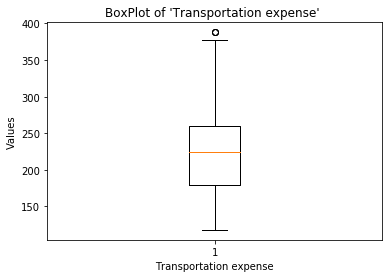

In [24]:
#Plotting boxplot of all the continous variable
%matplotlib inline
plt.boxplot(employee_data['Transportation expense'])
plt.xlabel('Transportation expense')
plt.title("BoxPlot of 'Transportation expense' ")
plt.ylabel('Values')

Text(0,0.5,'Values')

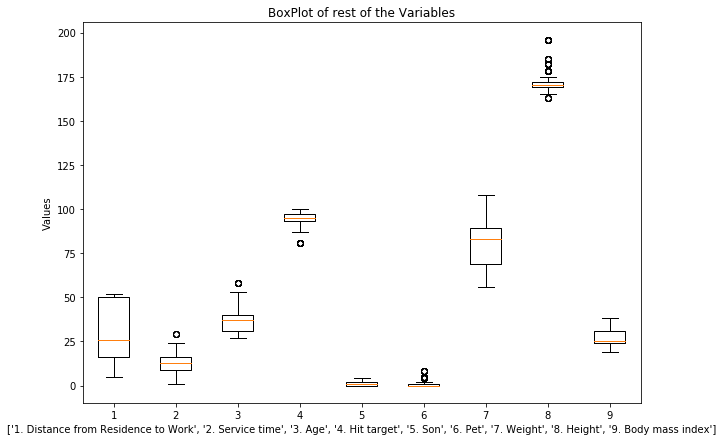

In [25]:
plt.figure(figsize = [10.0, 7.0])
plt.boxplot([employee_data['Distance from Residence to Work'], employee_data['Service time'], employee_data['Age'], employee_data['Hit target'], employee_data['Son'], employee_data['Pet'], employee_data['Weight'], employee_data['Height'], employee_data['Body mass index']])
plt.xlabel(['1. Distance from Residence to Work', '2. Service time', '3. Age', '4. Hit target', '5. Son', '6. Pet','7. Weight', '8. Height','9. Body mass index'])
plt.title("BoxPlot of rest of the Variables")
plt.ylabel('Values')

In [26]:
numeric_cnames = ['Transportation expense', 'Service time', 'Age', 'Work load Average/day ', 'Pet', 'Height' ]

In [27]:
#Detect and impute outliers with NA
for i in numeric_cnames:
    
    q75, q25 = np.percentile(employee_data[i], [75,25])
   
    iqr = q75 - q25
    
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
        

In [28]:
employee_data.loc[employee_data[i] < min,i] = np.nan
employee_data.loc[employee_data[i] > max,i] = np.nan

In [29]:
#check for missing value
employee_data.isnull().sum()

ID                                   0
Reason for absence                   0
Month of absence                     0
Day of the week                      0
Seasons                              0
Transportation expense               0
Distance from Residence to Work      0
Service time                         0
Age                                  0
Work load Average/day                0
Hit target                           0
Disciplinary failure                 0
Education                            0
Son                                  0
Social drinker                       0
Social smoker                        0
Pet                                  0
Weight                               0
Height                             119
Body mass index                      0
Absenteeism time in hours            0
dtype: int64

In [30]:
#Imputing missing values with KNN
employee_data = pd.DataFrame(KNN(k=3).complete(employee_data), columns = employee_data.columns)

Imputing row 1/740 with 0 missing, elapsed time: 0.215
Imputing row 101/740 with 1 missing, elapsed time: 0.217
Imputing row 201/740 with 0 missing, elapsed time: 0.218
Imputing row 301/740 with 0 missing, elapsed time: 0.220
Imputing row 401/740 with 0 missing, elapsed time: 0.221
Imputing row 501/740 with 0 missing, elapsed time: 0.223
Imputing row 601/740 with 0 missing, elapsed time: 0.224
Imputing row 701/740 with 0 missing, elapsed time: 0.225


In [31]:
employee_data.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

# Feature Selection

In [32]:
numeric_cnames = ['Reason for absence', 'Transportation expense', 'Distance from Residence to Work', 
                  'Service time','Age', 'Hit target', 'Disciplinary failure', 'Weight', 
                  'Height', 'Body mass index']

In [33]:
#Correlation plot 
employee_corr = employee_data.loc[:, numeric_cnames]

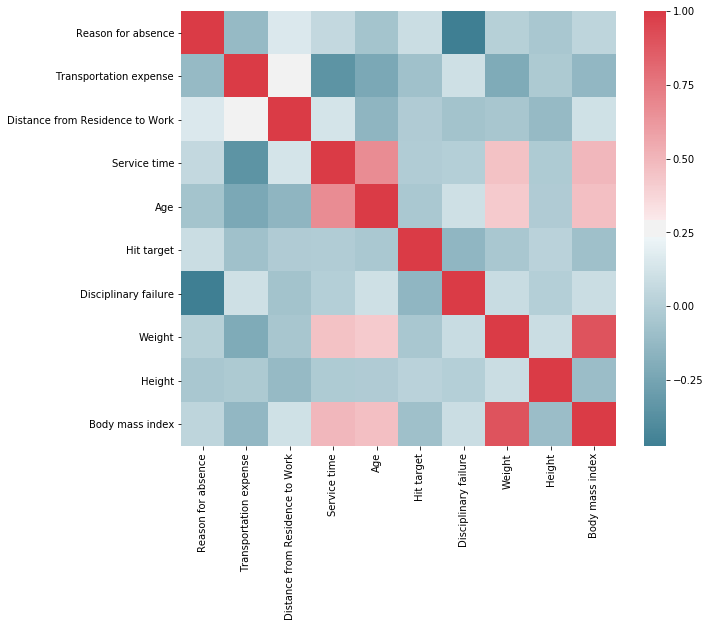

In [34]:
f, ax = plt.subplots(figsize=(10, 8))

corr = employee_corr.corr()

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [35]:
object_cnames = ['Month of absence', 'Day of the week', 'Seasons', 'Education', 'Son','Social drinker', 
                 'Social smoker', 'Pet' ]

In [36]:
#Chi-square test of independence
for i in object_cnames:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(employee_data['Absenteeism time in hours'], employee_data[i]))
    print(p)

Month of absence
0.5610564046544462
Day of the week
0.03425003246680665
Seasons
0.0001451512611825864
Education
1.0
Son
1.4263107432829422e-10
Social drinker
2.56900776256898e-07
Social smoker
0.03443359739819548
Pet
0.7784982918492078


In [37]:
employee_data = employee_data.drop(['Weight', 'Month of absence', 'Day of the week', 'Seasons','Education', 
                                    'Social smoker', 'Pet'], axis =1)

In [38]:
numeric_cnames = ["Reason for absence", "Transportation expense", "Distance from Residence to Work", "Service time", "Age",
                 "Disciplinary failure", "Hit target", "Height", "Body mass index"]

In [39]:
#Normalization

for i in numeric_cnames:
    print(i)
    employee_data[i] = (employee_data[i] - np.min(employee_data[i]))/(np.max(employee_data[i]) - np.min(employee_data[i]))

Reason for absence
Transportation expense
Distance from Residence to Work
Service time
Age
Disciplinary failure
Hit target
Height
Body mass index


# Model Development

In [40]:
#Devide the data in train and test
X = employee_data.values[:,0:13]
y = employee_data.values[:,13]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [41]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def RMSE(y, pred):
    print(sqrt(mean_squared_error(y, pred)))

In [42]:
#1.Decison Tree Regression
DT_regressor = DecisionTreeRegressor()
DT_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [43]:
DT_predict = DT_regressor.predict(X_test)

In [44]:
RMSE(y_test, DT_predict)
#RMSE Value : 16.79
#Accuracy : 83.21

21.771973250186033


In [45]:
#2.Random Forest Regression
RF_regressor = RandomForestRegressor()
RF_regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [46]:
RF_predict = RF_regressor.predict(X_test)

In [47]:
RMSE(y_test, RF_predict)
#RMSE Value : 9.97
#Accuracy : 90.03

16.628458069393865


In [48]:
#3.Multiple Linear Regression
LR_regressor = LinearRegression()
LR_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
LR_predict = LR_regressor.predict(X_test)

In [50]:
RMSE(y_test, LR_predict)
#RMSE Value : 8.09
#Accuracy : 91.91

15.816486718302627


In [51]:
#How much losses every month can we project in 2011 if same trend of absenteeism continues

In [52]:
loss_per_month = Data1[['Month of absence','Service time','Work load Average/day ','Absenteeism time in hours']]

In [53]:
loss_per_month["Loss"]=(loss_per_month['Work load Average/day ']*loss_per_month['Absenteeism time in hours'])/loss_per_month['Service time']

/home/neha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [54]:
loss_per_month["Loss"] = np.round(loss_per_month["Loss"]).astype('int64')

/home/neha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [55]:
loss_per_month.head()

,Month of absence,Service time,Work load Average/day,Absenteeism time in hours,Loss
0,7.0,13.0,239554.0,4.0,73709
1,7.0,18.0,239554.0,0.0,0
2,7.0,18.0,239554.0,2.0,26617
3,7.0,14.0,239554.0,4.0,68444
4,7.0,13.0,239554.0,2.0,36854


In [56]:
#No_absent = loss_per_month[loss_per_month['Month of absence'] == 0]['Loss'].sum()
January = loss_per_month[loss_per_month['Month of absence'] == 1]['Loss'].sum()
February = loss_per_month[loss_per_month['Month of absence'] == 2]['Loss'].sum()
March = loss_per_month[loss_per_month['Month of absence'] == 3]['Loss'].sum()
April = loss_per_month[loss_per_month['Month of absence'] == 4]['Loss'].sum()
May = loss_per_month[loss_per_month['Month of absence'] == 5]['Loss'].sum()
June = loss_per_month[loss_per_month['Month of absence'] == 6]['Loss'].sum()
July = loss_per_month[loss_per_month['Month of absence'] == 7]['Loss'].sum()
August = loss_per_month[loss_per_month['Month of absence'] == 8]['Loss'].sum()
September = loss_per_month[loss_per_month['Month of absence'] == 9]['Loss'].sum()
October = loss_per_month[loss_per_month['Month of absence'] == 10]['Loss'].sum()
November = loss_per_month[loss_per_month['Month of absence'] == 11]['Loss'].sum()
December = loss_per_month[loss_per_month['Month of absence'] == 12]['Loss'].sum()

In [57]:
record = {'Janaury': January,'Febraury': February,'March': March,
       'April': April, 'May': May,'June': June,'July': July,
       'August': August,'September': September,'October': October,'November': November,
       'December': December}

In [58]:
WorkLoss_permonth = pd.DataFrame.from_dict(record, orient='index')

In [59]:
WorkLoss_permonth.rename(index=str, columns={0: "Work Load Loss/Month"})

,Work Load Loss/Month
Janaury,6351550
Febraury,8268542
March,16584985
April,10999489
May,9985056
June,14779779
July,19106688
August,9482329
September,6709876
October,10437477


# Data Visualizations

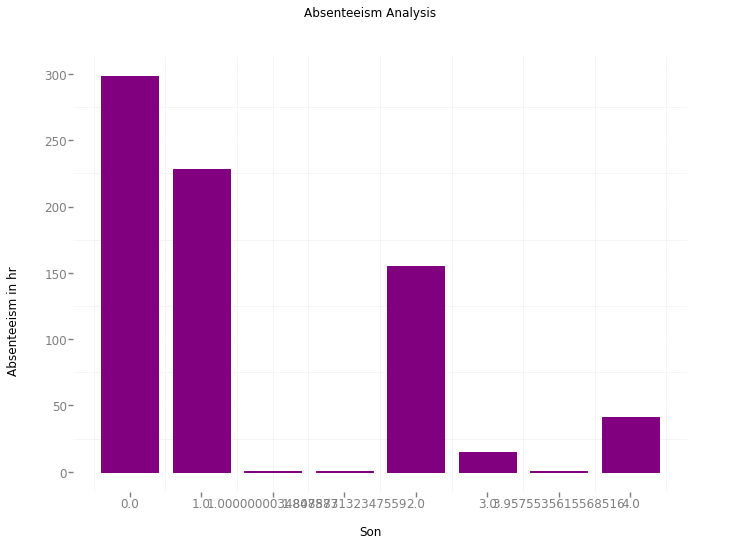

<ggplot: (8748817060707)>

In [72]:
ggplot(Data1, aes(x='Son', y='Absenteeism time in hours')) +\
    geom_bar(fill= "Purple") +\
    scale_color_brewer(type='diverging', palette=5) +\
    xlab("Son") + ylab("Absenteeism in hr") + ggtitle("Absenteeism Analysis") + theme_bw()

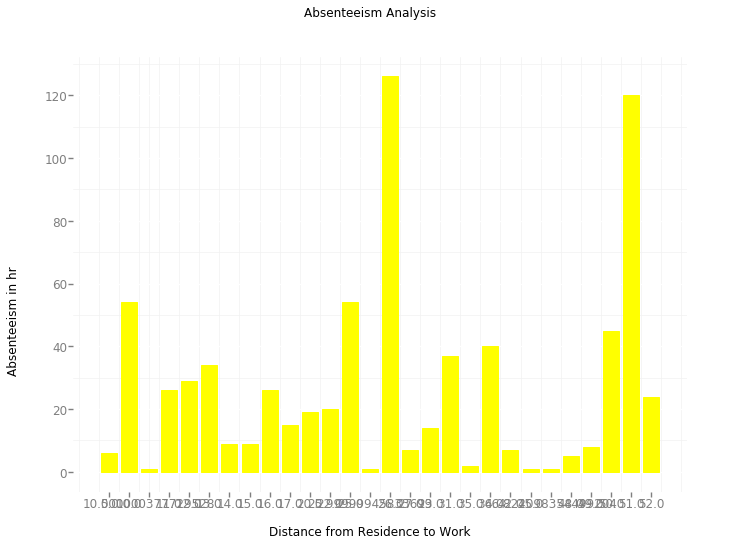

<ggplot: (-9223363288037770510)>

In [73]:
ggplot(Data1, aes(x='Distance from Residence to Work', y='Absenteeism time in hours')) +\
    geom_bar(fill= "Yellow") +\
    scale_color_brewer(type='diverging', palette=5) +\
    xlab("Distance from Residence to Work") + ylab("Absenteeism in hr") + ggtitle("Absenteeism Analysis") + theme_bw()

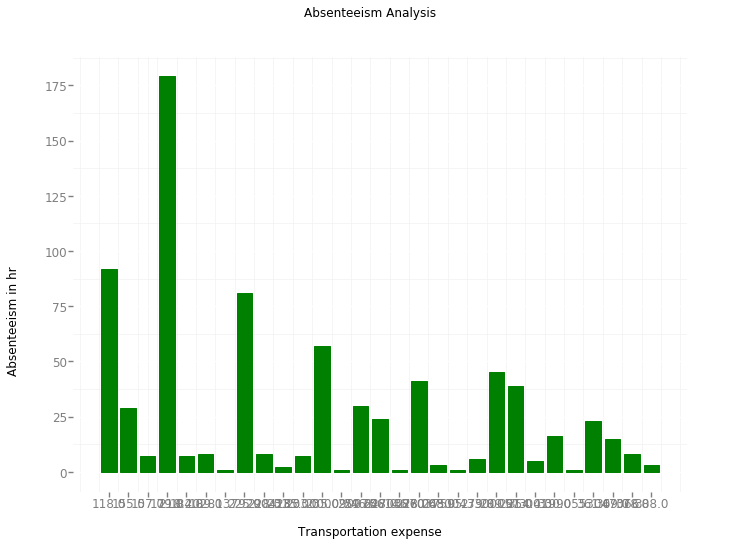

<ggplot: (-9223363288038044002)>

In [79]:
ggplot(Data1, aes(x='Transportation expense', y='Absenteeism time in hours')) +\
    geom_bar(fill= "Green") +\
    scale_color_brewer(type='diverging', palette=5) +\
    xlab("Transportation expense") + ylab("Absenteeism in hr") + ggtitle("Absenteeism Analysis") + theme_bw()

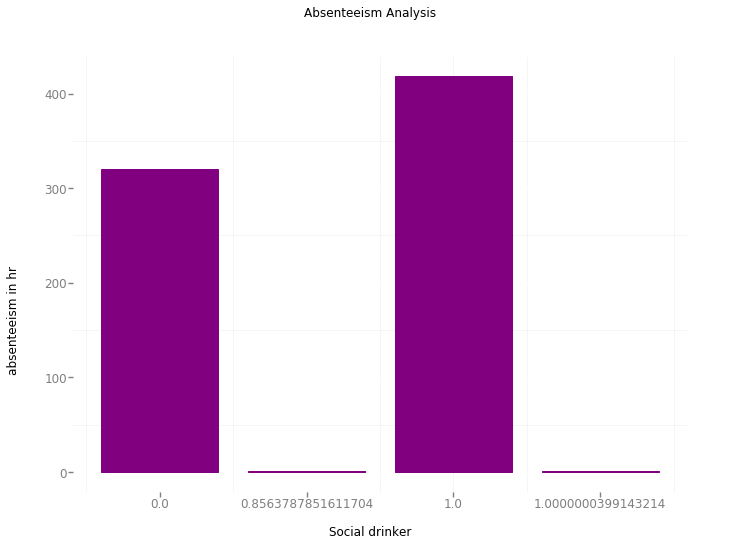

<ggplot: (-9223363247797548982)>

In [62]:
ggplot(Data1, aes(x='Social drinker', y='Absenteeism time in hours')) +\
    geom_bar(fill= "Purple") +\
    scale_color_brewer(type='diverging', palette=5) +\
    xlab("Social drinker") + ylab("absenteeism in hr") + ggtitle("Absenteeism Analysis") + theme_bw()

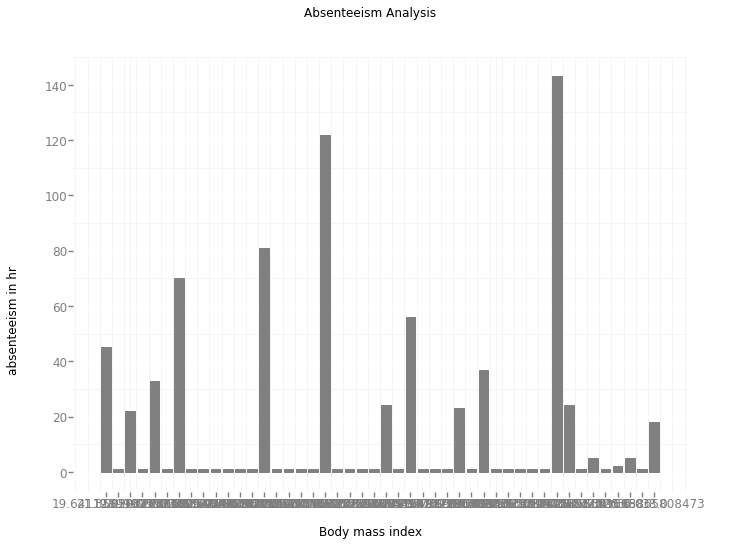

<ggplot: (-9223363288038203939)>

In [83]:
ggplot(Data1, aes(x='Body mass index', y='Absenteeism time in hours')) +\
    geom_bar(fill= "Grey") +\
    scale_color_brewer(type='diverging', palette=5) +\
    xlab("Body mass index") + ylab("absenteeism in hr") + ggtitle("Absenteeism Analysis") + theme_bw()

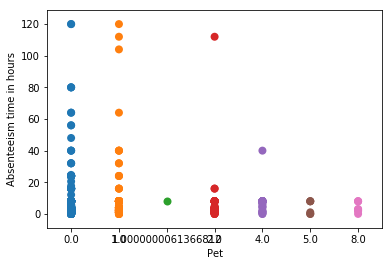

In [64]:
sns.stripplot(x="Pet", y="Absenteeism time in hours", data=Data1, size = 8);
plt.savefig('Month of absence.png')

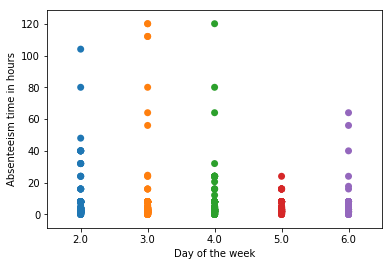

In [92]:
sns.stripplot(x="Day of the week", y="Absenteeism time in hours", data=Data1, size = 7);
plt.savefig('Day of the week.png')

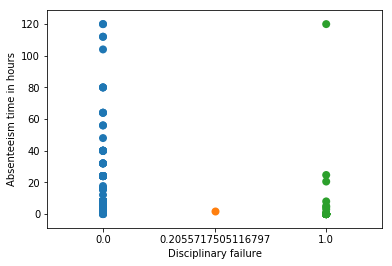

In [94]:
sns.stripplot(x="Disciplinary failure", y="Absenteeism time in hours", data=Data1, size = 8);
plt.savefig('Disciplinary failure.png')

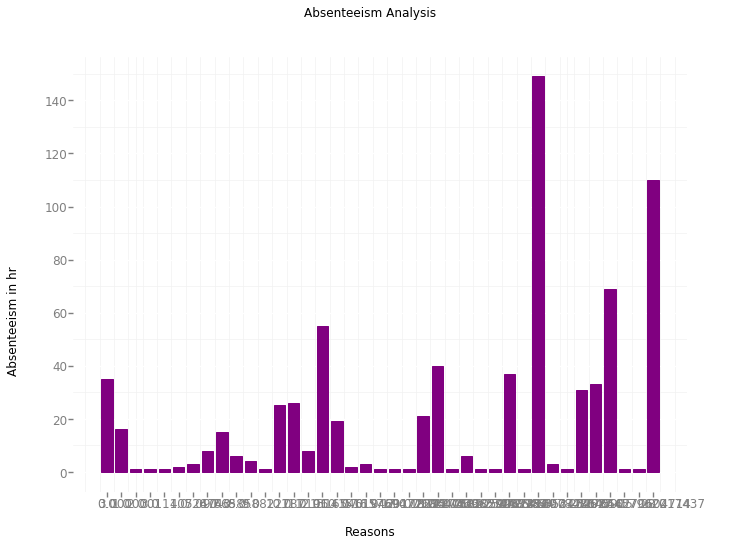

<ggplot: (8789057262512)>

In [61]:
ggplot(Data1, aes(x='Reason for absence', y='Absenteeism time in hours')) +\
    geom_bar(fill= "Purple") +\
    scale_color_brewer(type='diverging', palette=5) +\
    xlab("Reasons") + ylab("Absenteeism in hr") + ggtitle("Absenteeism Analysis") + theme_bw()